In [4]:
import pandas as pd
df=pd.read_csv("cleaned_power_consumption.csv")
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Hour,Day,...,Month,IsWeekend,Lag_1,Lag_24,RollingMean_6,RollingMean_24,Device_Total_Consumption,Device_Avg_Consumption,Device_Max_Consumption,Device_Min_Consumption
0,4.474,0.0,234.96,19.4,0.0,0.0,17.0,2006-12-16 17:48:00,17.0,16.0,...,12.0,1.0,5.174,4.216,5.667000,4.574917,17.0,5.666667,17.0,0.0
1,3.248,0.0,236.66,13.6,0.0,0.0,17.0,2006-12-16 17:49:00,17.0,16.0,...,12.0,1.0,4.474,5.360,5.587000,4.486917,17.0,5.666667,17.0,0.0
2,3.236,0.0,235.84,13.6,0.0,0.0,17.0,2006-12-16 17:50:00,17.0,16.0,...,12.0,1.0,3.248,5.374,5.144000,4.397833,17.0,5.666667,17.0,0.0
3,3.228,0.0,235.60,13.6,0.0,0.0,17.0,2006-12-16 17:51:00,17.0,16.0,...,12.0,1.0,3.236,5.388,4.397667,4.307833,17.0,5.666667,17.0,0.0
4,3.258,0.0,235.49,13.8,0.0,0.0,17.0,2006-12-16 17:52:00,17.0,16.0,...,12.0,1.0,3.228,3.666,3.769667,4.290833,17.0,5.666667,17.0,0.0


In [5]:
import pandas as pd

df = pd.read_csv("cleaned_power_consumption.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

weekly_high = df.resample('W').max()
weekly_low  = df.resample('W').min()

weekly_high.head(), weekly_low.head()

(            Global_active_power  Global_reactive_power  Voltage  \
 Datetime                                                          
 2006-12-17                7.064                  0.582   249.37   
 2006-12-24                8.698                  0.724   249.48   
 2006-12-31                9.132                  0.800   251.70   
 2007-01-07                8.044                  0.862   250.02   
 
             Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
 Datetime                                                                       
 2006-12-17              30.0            38.0            71.0            19.0   
 2006-12-24              37.0            40.0            73.0            20.0   
 2006-12-31              39.4            77.0            74.0            20.0   
 2007-01-07              35.6            39.0            75.0            19.0   
 
             Hour  Day  DayOfWeek  Month  IsWeekend  Lag_1  Lag_24  \
 Datetime                       

In [6]:
import numpy as np
import pandas as pd

data = pd.read_csv("cleaned_power_consumption.csv")
values = data.iloc[:, 1].values

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(values, window=10)

In [7]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

In [10]:
model.compile(optimizer='adam', loss='mse')

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 10/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 11/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 12/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/st

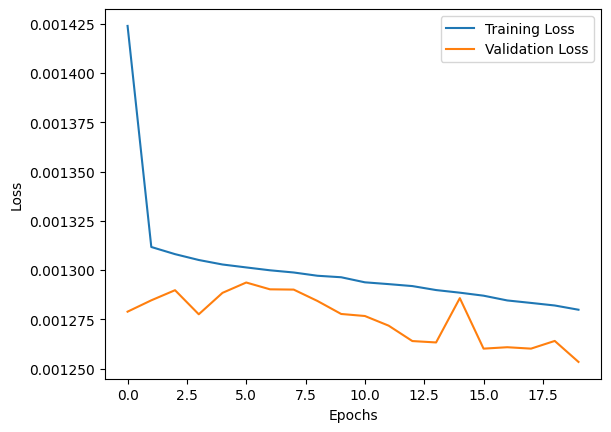

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [12]:
model.save("lstm_energy_consumption_model.keras")

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

In [14]:
df = pd.read_csv("cleaned_power_consumption.csv")
values = df.iloc[:, 1].values

def create_sequences(data, window=10):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(values)
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [15]:
lr = LinearRegression()
lr.fit(X_train.reshape(len(X_train), -1), y_train)

lr_preds = lr.predict(X_test.reshape(len(X_test), -1))

In [17]:
lstm_model = load_model("lstm_energy_consumption_model.keras")

X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
lstm_preds = lstm_model.predict(X_test_lstm).flatten()

7816/7816 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step


In [22]:
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

lr_metrics = evaluate_model(y_test, lr_preds)
lstm_metrics = evaluate_model(y_test, lstm_preds)

lr_metrics, lstm_metrics

({'MAE': 0.019244170951630456,
  'RMSE': np.float64(0.03817707761058367),
  'R2': 0.8581192923748882},
 {'MAE': 0.018607510961878817,
  'RMSE': np.float64(0.03824635898385827),
  'R2': 0.8576038726500248})

In [23]:
best_model = "LSTM" if lstm_metrics["RMSE"] < lr_metrics["RMSE"] else "Linear Regression"
best_model

'Linear Regression'

In [27]:
last_sequence = values[-10:].reshape(1, 10, 1)
future_prediction = lstm_model.predict(last_sequence)[0][0]

future_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


np.float32(0.11488516)

In [29]:
threshold = np.mean(values)

alert_status = "⚠️ High Energy Usage Alert" if future_prediction > threshold else "Normal Usage"
alert_status

'Normal Usage'

In [32]:
appliances = {
    "AC": True,
    "Refrigerator": True,
    "Washing Machine": True,
    "Lights": True,
    "TV": False
}

In [35]:
recommendations = []

if appliances.get("AC"):
    recommendations.append(
        "Set AC temperature between 24°C–26°C to reduce electricity consumption by up to 20%."
    )

if appliances.get("Refrigerator"):
    recommendations.append(
        "Set refrigerator temperature to 3°C–5°C and avoid frequent door opening."
    )

if appliances.get("Washing Machine"):
    recommendations.append(
        "Use washing machine in full-load mode and prefer cold water wash."
    )

if appliances.get("Lights"):
    recommendations.append(
        "Replace conventional bulbs with LED lights and turn off lights when not needed."
    )

if appliances.get("TV"):
    recommendations.append(
        "Enable power-saving mode and switch off TV instead of standby."
    )


In [36]:
print("Personalized Energy-Saving Recommendations:")
for rec in recommendations:
    print("-", rec)

Personalized Energy-Saving Recommendations:
- Set AC temperature between 24°C–26°C to reduce electricity consumption by up to 20%.
- Set refrigerator temperature to 3°C–5°C and avoid frequent door opening.
- Use washing machine in full-load mode and prefer cold water wash.
- Replace conventional bulbs with LED lights and turn off lights when not needed.
